<a href="https://colab.research.google.com/github/sohumbansal/Brain-tumor-detection/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from keras.applications import MobileNetV2
from keras.layers import Dense
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import os

In [ ]:
brain_df = pd.read_csv('/content/Brain Tumor.csv',usecols=[0,1])
brain_df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [ ]:
brain_df.isna().sum()

Image    0
Class    0
dtype: int64

In [ ]:
brain_df['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

<Axes: ylabel='count'>

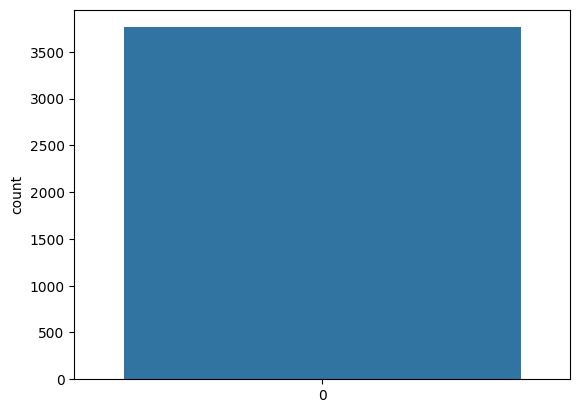

In [ ]:
sns.countplot(brain_df['Class'])

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Brain Tumor.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
path_list = []
base_path = '/content/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [ ]:
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)

In [ ]:
brain_df.head()

,Image,Class,pathes
0,Image1,0,/content/Brain Tumor/Image1.jpg
1,Image2,0,/content/Brain Tumor/Image2.jpg
2,Image3,1,/content/Brain Tumor/Image3.jpg
3,Image4,1,/content/Brain Tumor/Image4.jpg
4,Image5,0,/content/Brain Tumor/Image5.jpg


<ipython-input-12-c413401e5711>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,x+1)


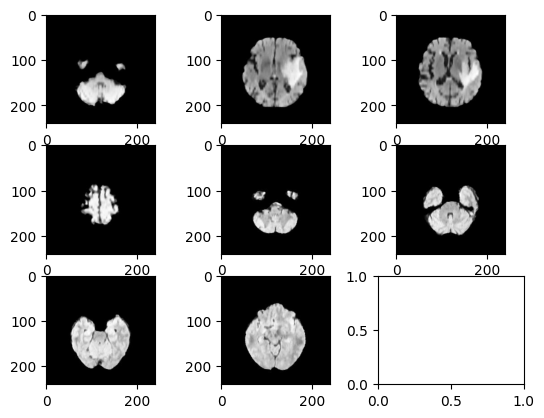

In [ ]:
for x in range (0 ,9):
    img = imread(brain_df['pathes'][x])
    plt.imshow(img)
    plt.subplot(3,3,x+1)

In [ ]:
from PIL.Image import open
brain_df['pixels']=brain_df['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))

In [ ]:
brain_df.head()

,Image,Class,pathes,pixels
0,Image1,0,/content/Brain Tumor/Image1.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/content/Brain Tumor/Image2.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/content/Brain Tumor/Image3.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/content/Brain Tumor/Image4.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/content/Brain Tumor/Image5.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [ ]:
image_list = []
for i in range(0,len(brain_df)):
    # load image
    brain_img = brain_df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.mobilenet_v2.preprocess_input(img_array))

# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [ ]:
y = np.array(brain_df.Class)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


In [ ]:
num_classes = 1
model = Sequential()
model.add(MobileNetV2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
# show model summary
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 preds (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])


# mock-train the model
model.fit(
    X_train,
    y_train,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test)
)
model.save("model_brain.h5")
print("Saved model to disk")

Epoch 1/5
95/95 [==============================] - 186s 2s/step - loss: 0.8642 - accuracy: 0.7295 - val_loss: 0.7530 - val_accuracy: 0.8061
Epoch 2/5
95/95 [==============================] - 166s 2s/step - loss: 0.7456 - accuracy: 0.8468 - val_loss: 0.7247 - val_accuracy: 0.8327
Epoch 3/5
95/95 [==============================] - 166s 2s/step - loss: 0.7183 - accuracy: 0.8687 - val_loss: 0.7086 - val_accuracy: 0.8406
Epoch 4/5
95/95 [==============================] - 163s 2s/step - loss: 0.7027 - accuracy: 0.8853 - val_loss: 0.6960 - val_accuracy: 0.8566
Epoch 5/5
95/95 [==============================] - 168s 2s/step - loss: 0.6955 - accuracy: 0.8897 - val_loss: 0.6872 - val_accuracy: 0.8659
Saved model to disk


In [ ]:
pretrained_cnn = keras.models.load_model('./model_brain.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 [==============================] - 33s 1s/step - loss: 0.6872 - accuracy: 0.8659
Eval loss: 0.687183141708374
Eval accuracy: 0.8658698797225952


In [ ]:
y_pred = (pretrained_cnn.predict(X_test) > 0.5).astype("int32")

24/24 [==============================] - 33s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

{'No Tumor': {'precision': 0.8452655889145496,
  'recall': 0.915,
  'f1-score': 0.8787515006002402,
  'support': 400},
 'Tumor': {'precision': 0.89375,
  'recall': 0.8101983002832861,
  'f1-score': 0.849925705794948,
  'support': 353},
 'accuracy': 0.8658698539176627,
 'macro avg': {'precision': 0.8695077944572749,
  'recall': 0.862599150141643,
  'f1-score': 0.8643386031975941,
  'support': 753},
 'weighted avg': {'precision': 0.8679946687461088,
  'recall': 0.8658698539176627,
  'f1-score': 0.8652382129956344,
  'support': 753}}

In [ ]:
confusion_matrix(y_test , y_pred )

array([[366,  34],
       [ 67, 286]])